## Método dos pórticos equivalentes

Os momentos fletores totais obtidos na análise deverão ser distribuídos por toda a largura da laje. 

Na análise elástica, os momentos negativos tendem a concentrar-se na vizinhança dos eixos dos pilares.

Deverá considerar-se os painéis divididos em faixas sobre pilares e em faixas centrais, e distribuir-se os momentos fletores conforme indicado no quadro.

![plant](./figs/flat-01.png)

Quando existem capitéis de largura maior do que $l_y/3$, poderá considerar-se para largura das faixas sobre os pilares a largura dos capitéis; a largura das faixas centrais deverá ser ajustada em conformidade.

Quando a largura da faixa sobre pilares é diferente de $0.5l_x$ e é considerada uma largura igual à do capitel, a largura da faixa central deverá ser ajustada em conformidade. 

Na análise do pórtio deve coonsiderar-se toda a carga atuante na faixa

![plant](./figs/flat-02.png)

Obtém-se os diagramas de momentos totais no pórtico

![plant](./figs/flat-03.png)

Distribuem-se os momentos pela banda doo pilar e pela banda central de acordoo com as percentagens da figura.

![plant](./figs/flat-04.png)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import eurocodepy as ec

### Análise de um piso com $n$ vãos  e carga uniformemente distribuída $u$

**Input data:**

In [2]:
uload = 17.5 # (kN/m2) slab load
col_coef = 0.75 # moment percentage over columns in column band
span_coef = 0.55 # moment percentage at mid span in column band
spans = np.array([7.0, 8.0, 8.0, 7.0]) # (m) length o the spans
widths = np.array([6.0, 6.0, 6.0, 6.0]) # (m) width of the band
col_width = np.array([]) # column band width if different from half of the width

**Calculations:**

moments:
 [[-29.4    53.018 -67.424]
 [-67.424  59.528 -58.8  ]
 [-58.8    59.528 -67.424]
 [-67.424  53.018 -29.4  ]]


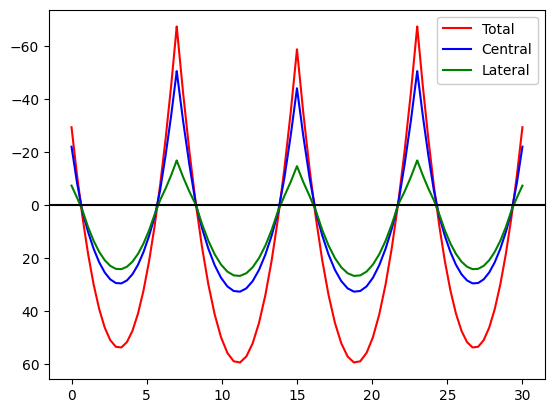

In [3]:
if col_width.size == 0: col_width = widths/2.0
n = spans.size # number of spans

if n == 2: 
    coefs = np.array([[-0.040, 0.075, -0.110],
                      [-0.110, 0.075, -0.040]])
elif n == 3:
    coefs = np.array([[-0.040, 0.075, -0.086], 
                      [-0.086, 0.068, -0.086], 
                      [-0.086, 0.075, -0.040]])
elif n == 4:
    coefs = np.array([[-0.040, 0.075, -0.086], 
                      [-0.086, 0.068, -0.070], 
                      [-0.070, 0.068, -0.086], 
                      [-0.086, 0.075, -0.040]])
elif n == 5:
    coefs = np.array([[-0.040, 0.075, -0.086], 
                      [-0.086, 0.068, -0.070], 
                      [-0.070, 0.068, -0.070],
                      [-0.070, 0.068, -0.086], 
                      [-0.086, 0.075, -0.040]])
else:
    coefs = np.array([[-0.040, 0.075, -0.086], 
                      [-0.086, 0.068, -0.070]])
    for i in range(2, n-2):
        coefs = np.concatenate((coefs, np.array([[-0.070, 0.068, -0.070]])))
    coefs = np.concatenate((coefs, np.array([[-0.070, 0.068, -0.086], [-0.086, 0.075, -0.04]])))

# Calculate total load in the span
loads = widths * uload * spans
# print("spans:\n", n)
# print("coefs:\n", coefs)
# print("loads:\n", loads)

# Calculate moments
moments = coefs * loads[:, np.newaxis]

# Calculate compatible moment at supports
mtot = -(moments[:,0] + moments[:,2])*0.5 + moments[:,1]
for i in range(1, n):
    l1 = 1.0/spans[i-1]
    l2 = 1.0/spans[i]
    moments[i-1, 2] = (moments[i-1,2]*l1+moments[i, 0]*l2)/(l1+l2)
    moments[i, 0] = moments[i-1, 2]
    moments[i-1, 1] = ((moments[i-1,0]+moments[i-1,2])*0.5) + mtot[i-1]

moments[n-1, 1] = ((moments[n-1,0]+moments[n-1,2])*0.5) + mtot[n-1]
print("moments:\n",moments)

import utils
# Plot the moments' diagram
xpos = np.zeros(0)
mom_tot = np.zeros(0)
for i in range(n):
    x1 = 0 if i == 0 else x1 + spans[i-1]
    x2 = x1 +  spans[i]/2.0
    x3 = x1 +  spans[i]
    x, y = utils.calc_parabola(x1, moments[i,0], x2, moments[i,1], x3, moments[i,2], 20)
    xpos = np.concatenate((xpos,x))
    mom_tot = np.concatenate((mom_tot,y))

mom_sup = np.where(mom_tot < 0, mom_tot*col_coef, mom_tot*span_coef)
mom_span = mom_tot-mom_sup
plt.plot(xpos, mom_tot, linestyle='-', color='red', label='Total')
plt.plot(xpos, mom_sup, linestyle='-', color='blue', label='Central') 
plt.plot(xpos, mom_span, linestyle='-', color='green', label='Lateral') 
plt.legend(framealpha=1, frameon=True)

ax = plt.gca()
ax.invert_yaxis()
plt.axhline(0, color='black')
plt.show()